In [1]:
import pandas as pd

awaker_file = pd.read_csv("targets.csv")
awaker_file.head()

,您的性別,您的年齡,您的居住地（不限設籍）,您平常有使用桃園市市民卡手機app的習慣嗎？,您知道許多超市已有推行即期品促銷的活動嗎？,在沒有特價的情況下，您對於即期品的購買意願？,若即期品提供折扣，您可以接受的「最高」價格為該商品原價打幾折？,關於即期品促銷活動，您的任何想法與回饋,若現在有一款app，顯示附近提供即期品的商家位置與資訊（GPS定位），以及即期品資訊即時更新（存量、折扣折數），請問您是否有使用意願？,承上題，若此功能直接建立在桃園市市民卡app中，請問您是否有使用意願？,...,您的聯絡電話,您的電子信箱,填答時間,填答秒數,IP紀錄,額滿結束註記,使用者紀錄,會員時間,會員編號,備註
0,生理男,40～49歲,八德區,每天使用,知道,不願意,五折,NaN,非常願意,非常願意,...,937092044,yang.wenli@msa.hinet.net,2020-06-17 16:15:47,103,114.37.78.112,NaN,NaN,NaN,NaN,NaN
1,生理女,40～49歲,八德區,每天使用,知道,不願意,四折以下,NaN,非常願意,非常願意,...,937092044,e22474@icloud.com,2020-06-17 16:18:18,74,114.37.78.112,NaN,NaN,NaN,NaN,NaN
2,生理女,40～49歲,八德區,時常使用，但一週不超過三次,不知道,願意,四折以下,只要產品沒變質都ok，不浪費食物,願意,願意,...,958420852,dear958420852@gmail.com,2020-06-17 19:20:11,147,101.136.28.250,NaN,NaN,NaN,NaN,NaN
3,生理女,30～39歲,八德區,從來沒用過,知道,不願意,九折,我覺得即期品能提供促銷不錯，可以撿到便宜,願意,願意,...,921971912,mary10186029@yahoo.com,2020-06-18 13:31:42,261,2001:b011:5c0e:184b:cc9f:ce20:b196:4be3,NaN,NaN,NaN,NaN,NaN
4,生理男,19～29歲,八德區,從來沒用過,知道,願意,七折,買一送一,願意,願意,...,981712825,nds10416@gmail.com,2020-06-18 15:40:25,77,122.116.5.57,NaN,NaN,NaN,NaN,NaN


In [93]:
sex_list = list(awaker_file["您的性別"])
sex_set = list(set(sex_list))
sex_count = []
sex_dict = {}

#統計數量
for i in sex_set:
    sex_count.append(sex_list.count(i))

#計算趴數    
sex_count_per = []
for i in sex_count:
    sex_count_per.append(round(i / len(sex_list) , 2))

dict_2 = {} 
for i  in range(len(sex_set)):
    dict_2[sex_set[i]] = sex_count_per[i]

for i in range(len(sex_set)):
    sex_dict[sex_set[i]] = sex_count[i]
    
sex_df_0 = pd.DataFrame.from_dict(sex_dict, orient='index')
sex_df_1 = pd.DataFrame.from_dict(dict_2, orient='index')

sex_df = pd.concat([sex_df_0 , sex_df_1] , axis = 1)
sex_df

,0,0
生理女,179,0.62
其他,3,0.01
生理男,109,0.37


In [82]:
len(sex_list)
sex_count_per = []
for i in sex_count:
    sex_count_per.append(round(i / len(sex_list) , 2))
    
sex_count_per

[0.62, 0.01, 0.37]

In [2]:
def get_figure(column_name):
    
    column_list = list(awaker_file[column_name])
    column_set = list(set(column_list))
    column_count = []
    column_count_per = []
    column_dict = {}
    per_dict = {} 
    
    
    #計算數量
    for i in column_set:
        column_count.append(column_list.count(i))
    for i in range(len(column_set)):
        column_dict[column_set[i]] = column_count[i]
        
    #計算趴數
    for i in column_count:
        column_count_per.append(round(i / len(column_list) , 2))
    for i  in range(len(column_set)):
        per_dict[column_set[i]] = column_count_per[i]
        
        
    
    column_df_0 = pd.DataFrame.from_dict(column_dict, orient='index')
    column_df_0_rename = column_df_0.rename(columns = {0:column_name})
    column_df_1 = pd.DataFrame.from_dict(per_dict, orient='index')
    column_df_1_rename = column_df_1.rename(columns = {0:"趴數"})
    column_df = pd.concat([column_df_0_rename , column_df_1_rename] , axis = 1)
    return column_df.T

In [3]:
get_figure("您的性別")

,生理女,生理男,其他
您的性別,179.00,109.00,3.00
趴數,0.62,0.37,0.01


In [4]:
all_columns_list = list(awaker_file.columns)
all_columns_list

['您的性別',
 '您的年齡',
 '您的居住地（不限設籍）',
 '您平常有使用桃園市市民卡手機app的習慣嗎？',
 '您知道許多超市已有推行即期品促銷的活動嗎？',
 '在沒有特價的情況下，您對於即期品的購買意願？',
 '若即期品提供折扣，您可以接受的「最高」價格為該商品原價打幾折？',
 '關於即期品促銷活動，您的任何想法與回饋',
 '若現在有一款app，顯示附近提供即期品的商家位置與資訊（GPS定位），以及即期品資訊即時更新（存量、折扣折數），請問您是否有使用意願？',
 '承上題，若此功能直接建立在桃園市市民卡app中，請問您是否有使用意願？',
 '關於即期品資訊整合app，您的任何想法與回饋',
 '您的姓名',
 '您的聯絡電話',
 '您的電子信箱',
 '填答時間',
 '填答秒數',
 'IP紀錄',
 '額滿結束註記',
 '使用者紀錄',
 '會員時間',
 '會員編號',
 '備註']

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["simhei"] 

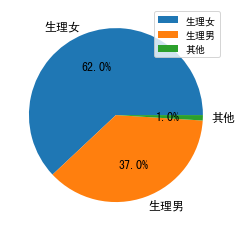

In [37]:
sex_df = get_figure(all_columns_list[0])
sex_list = list(sex_df.columns)


plt.pie(sex_df.T["趴數"] , 
            autopct = "%1.1f%%",
            textprops = {"fontsize" : 12},
            labels = sex_list)
            
plt.legend()

In [26]:
sex_list = list(sex_df.columns)
sex_list

['生理女', '生理男', '其他']

In [38]:
sex_df

,生理女,生理男,其他
您的性別,179.00,109.00,3.00
趴數,0.62,0.37,0.01


In [6]:
get_figure(all_columns_list[1])

,40～49歲,30～39歲,18歲以下,19～29歲,60～69歲,50～59歲,70歲以上
您的年齡,52.00,56.00,28.0,110.00,11.00,29.0,5.00
趴數,0.18,0.19,0.1,0.38,0.04,0.1,0.02


In [7]:
get_figure(all_columns_list[2])

,龜山區,八德區,桃園區,龍潭區,蘆竹區,大溪區,大園區,新屋區,楊梅區,中壢區,平鎮區
您的居住地（不限設籍）,16.00,32.00,100.00,8.00,17.00,2.00,5.00,12.00,12.00,75.00,12.00
趴數,0.05,0.11,0.34,0.03,0.06,0.01,0.02,0.04,0.04,0.26,0.04


In [8]:
get_figure(all_columns_list[3])

,從來沒用過,每天使用,我沒有市民卡,很少使用，一個月不超過三次,時常使用，但一週不超過三次
您平常有使用桃園市市民卡手機app的習慣嗎？,107.00,36.00,51.00,60.00,37.00
趴數,0.37,0.12,0.18,0.21,0.13


In [9]:
get_figure(all_columns_list[4])

,知道,不知道
您知道許多超市已有推行即期品促銷的活動嗎？,221.00,70.00
趴數,0.76,0.24


In [10]:
get_figure(all_columns_list[5])

,沒有意見,非常不願意,不願意,願意,非常願意
在沒有特價的情況下，您對於即期品的購買意願？,57.0,27.00,103.00,60.00,44.00
趴數,0.2,0.09,0.35,0.21,0.15


In [11]:
get_figure(all_columns_list[6])

,六折,九折,七折,八折,四折以下,五折,沒意見
若即期品提供折扣，您可以接受的「最高」價格為該商品原價打幾折？,42.00,12.00,57.0,54.00,50.00,63.00,13.00
趴數,0.14,0.04,0.2,0.19,0.17,0.22,0.04


In [12]:
get_figure(all_columns_list[8])

,非常不願意,不願意,願意,非常願意,沒意見
若現在有一款app，顯示附近提供即期品的商家位置與資訊（GPS定位），以及即期品資訊即時更新（存量、折扣折數），請問您是否有使用意願？,1.0,4.00,140.00,109.00,37.00
趴數,0.0,0.01,0.48,0.37,0.13


In [13]:
get_figure(all_columns_list[9])

,願意,非常願意,沒意見,不願意
承上題，若此功能直接建立在桃園市市民卡app中，請問您是否有使用意願？,135.00,103.00,46.00,7.00
趴數,0.46,0.35,0.16,0.02
